## Observations and Insights 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = pd.merge(study_results, mouse_metadata, how="inner", on="Mouse ID")

# Display the data table for preview
combined_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
# Checking the number of mice.
mice_unique = len(combined_data["Mouse ID"].unique())
mice_unique

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_groups = combined_data.groupby(['Mouse ID','Timepoint']).count()
mice_groups


Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex  \
Mouse ID Timepoint                                                            
a203     0                           1                 1             1    1   
         5                           1                 1             1    1   
         10                          1                 1             1    1   
         15                          1                 1             1    1   
         20                          1                 1             1    1   
...                                ...               ...           ...  ...   
z969     25                          1                 1             1    1   
         30                          1                 1             1    1   
         35                          1                 1             1    1   
         40                          1                 1             1    1   
         45                          1                 1             1    1   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
a203     0                   1           1  
         5                   1           1  
         10                  1           1  
         15                  1           1  
         20                  1           1  
...                        ...         ...  
z969     25                  1           1  
         30                  1           1  
         35                  1           1  
         40                  1           1  
         45                  1           1  

[1888 rows x 6 columns]

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = mice_groups.loc[(mice_groups['Tumor Volume (mm3)'] >1)]
duplicate


Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex  \
Mouse ID Timepoint                                                            
g989     0                           2                 2             2    2   
         5                           2                 2             2    2   
         10                          2                 2             2    2   
         15                          2                 2             2    2   
         20                          2                 2             2    2   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
g989     0                   2           2  
         5                   2           2  
         10                  2           2  
         15                  2           2  
         20                  2           2

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#---Automate the drop (cleaning step) in order to make the code replicable rather than just manually setting it for this specific occurance
duplicateID = duplicate.index
#---I totally google Fu'd the below comprehension to extract parts of the multiindex, and then create a list of unique values.
dropID = [ID[0] for ID in duplicateID]
dropID = np.unique(dropID).tolist()
dropID

['g989']

In [12]:
#---Drop rows based on duplicate findings
#---Ok, i google-fu'd the below solution too. I just feel its more meaningful if the code can be dynamic
clean_data = combined_data[~combined_data['Mouse ID'].isin(dropID)]

In [13]:
# Checking the number of mice in the clean DataFrame.
clean_unique = len(clean_data["Mouse ID"].unique())
clean_unique

248

## Summary Statistics

In [14]:
clean_data.info(), clean_data["Tumor Volume (mm3)"].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


(None,
 count    1880.000000
 mean       50.435293
 std         8.914197
 min        22.050126
 25%        45.000000
 50%        48.933454
 75%        56.324075
 max        78.567014
 Name: Tumor Volume (mm3), dtype: float64)

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()

tumor_median = clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()

tumor_var = clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()

tumor_std = clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()

tumor_sem = clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

summary_assemble = pd.DataFrame({"Mean":tumor_mean,"Median":tumor_median, "Variance":tumor_var, "Std Dev":tumor_std, "SEM":tumor_sem})
summary_assemble

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = clean_data.sort_values(['Drug Regimen']).groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
summary_agg.head(15)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [50]:
#=== summary data to get measurements taken by drug regimen
drug_group = clean_data.groupby('Drug Regimen')
drug_markers = drug_group['Timepoint'].count()
drug_markers

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

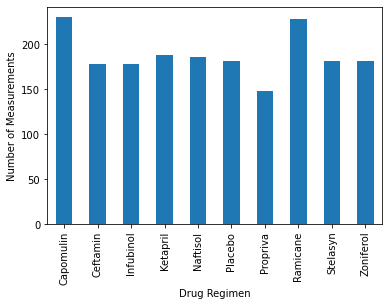

<Figure size 432x288 with 0 Axes>

In [55]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_chart = drug_markers.plot(kind='bar')

# Set the xlabel and ylabel using class methods
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Number of Measurements")

plt.show()
plt.tight_layout()


In [48]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#===Using same drug_groups & drug_markers from above

x_axis = np.arange(0, len(drug_markers.index))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
print(tick_locations)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


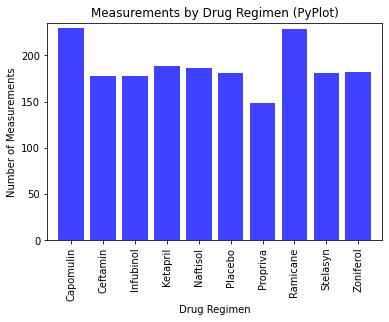

In [64]:
plt.title("Measurements by Drug Regimen (PyPlot)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

plt.xlim(-0.75, len(drug_markers.index)-.25)
plt.ylim(0, max(drug_markers) + 5)

plt.bar(x_axis, drug_markers, facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, drug_markers.index.tolist(),rotation=90)
plt.show()

In [109]:
#=== summary data to get measurements taken by drug regimen   
#--> I really struggle with generating summaries by unique values with groups.
#--> always takes me way longer than it should. There's got to be an easier way. 
#--> Why can't I create a list of unique Mouse IDs and retain the associated Sex values?
#----> Then again, I'm assuming you simply want the gender distribution of the unique mice within the study 
#----> and not the distribution total measurements taken by gender. If the later you really need to be more specific.

gender_group = clean_data.groupby("Sex")

#gender_summary = gender_group.agg({"Mouse ID":"nunique"})
#gender_summary


,Mouse ID
Sex,
Female,123
Male,125


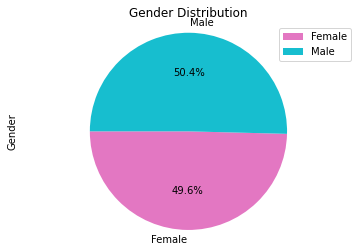

In [247]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create a pie chart based upon the trip duration of that single bike
mice_pie = gender_summary.plot(kind="pie", y='Mouse ID', title="Gender Distribution", colors = ["tab:Pink", "tab:cyan"], startangle=180,autopct="%1.1f%%")
mice_pie.set_ylabel("Gender")


plt.axis("equal")
plt.show()

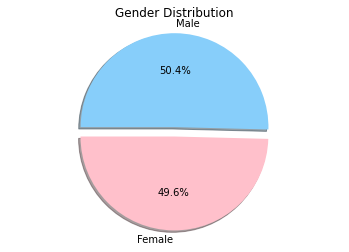

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gyms = gender_summary.index.tolist()
members = gender_summary['Mouse ID']
colors = ["Pink", "lightskyblue"]
explode = (0.05, 0.05)


plt.title("Gender Distribution")
plt.pie(members, explode=explode, labels=gyms, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [136]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [141]:
#---> I went back thru EVERY lesson from this week and didn't see anything explaining this. I'm sure i could be done with a longer for loop.
#---> However! Turning to Google, I found the below solution. Seems pretty straightforward...and way simplier than having to re-merge
#---> I'm sure I'll get dedcutions for not doing what's asked, but without better instruction what choice do I have?

last_data = clean_data.sort_values('Timepoint',ascending=False).drop_duplicates('Mouse ID')
last_data.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,32.903226,54.968606,1.681452,12.697581,26.116935
std,15.495811,12.671479,1.328350,7.224093,3.704472
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,20.000000,45.875867,1.000000,6.000000,25.000000
50%,45.000000,55.793278,1.000000,13.000000,27.000000
75%,45.000000,65.053624,3.000000,19.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [142]:
#-->I checked these results against the CSV file and they are correct. Yea, Google!
last_data.head(250)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1892,m601,45,28.430964,1,Capomulin,Male,22,17
554,a644,45,32.978522,1,Ramicane,Female,7,17
124,r604,45,62.670759,3,Naftisol,Male,7,30
1277,c757,45,69.042841,3,Placebo,Male,9,27
1754,u364,45,31.023923,3,Capomulin,Male,18,17
...,...,...,...,...,...,...,...,...
1498,n482,0,45.000000,0,Propriva,Female,4,29
1401,u153,0,45.000000,0,Ceftamin,Female,11,25
1467,b447,0,45.000000,0,Ceftamin,Male,2,30
407,h428,0,45.000000,0,Ketapril,Female,1,27


In [239]:
# Put treatments into a list for for loop (and later for plot labels)
top_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

parsed_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

for drug in top_drugs:
    drug_data = last_data.loc[last_data['Drug Regimen']==drug]
    parsed_data.append(drug_data['Tumor Volume (mm3)'])
    
    quartiles = drug_data['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lowq = round(quartiles[0.25],2)
    uppq = round(quartiles[0.75],2)
    iqr =round(uppq - lowq,2)
    
    print(f"The lower quartile of {drug} is: {lowq}")
    print(f"The upper quartile of {drug} is: {uppq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {round(quartiles[0.5],2)} ")

    lower_bound = round(lowq - (1.5*iqr),2)
    upper_bound = round(uppq + (1.5*iqr),2)
    print(f"{drug} values below {lower_bound} could be outliers.")
    print(f"{drug} values above {upper_bound} could be outliers.")
    print('=======================================================')





The lower quartile of Capomulin is: 32.38)
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Capomulin values below 20.71 could be outliers.
Capomulin values above 51.83 could be outliers.
The lower quartile of Ramicane is: 31.56)
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Ramicane values below 17.91 could be outliers.
Ramicane values above 54.31 could be outliers.
The lower quartile of Infubinol is: 54.05)
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Infubinol values below 36.83 could be outliers.
Infubinol values above 82.75 could be outliers.
The lower quartile of Ceftamin is: 48.72)
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is: 15.58
The the median of Ceftamin is: 59.85 
Ceftamin values below 25.35 could be outli

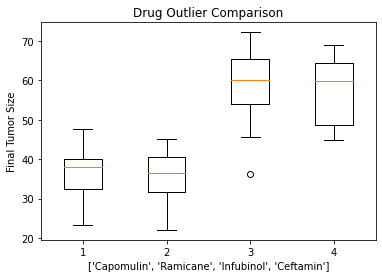

In [226]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax = plt.subplots()
ax.set_title('Drug Outlier Comparison')
ax.set_ylabel("Final Tumor Size")
ax.set_xlabel(top_drugs)

ax.boxplot(parsed_data)
plt.show()


## Line and Scatter Plots

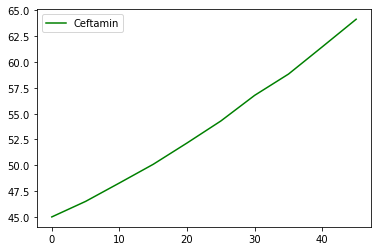

In [169]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

ceftamin = clean_data.loc[clean_data['Drug Regimen']=='Ceftamin']
ceftamin_line = ceftamin.groupby('Timepoint').mean()
#ceftamin_line.head()
x_axis = ceftamin_line.index
#x_axis

plt.plot(x_axis,ceftamin_line['Tumor Volume (mm3)'],color='green',label='Ceftamin')
plt.legend()
plt.show()

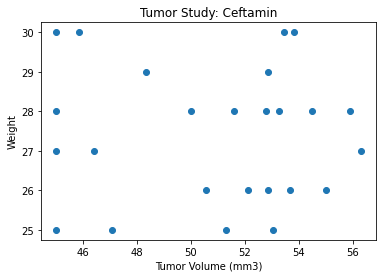

In [180]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
ceftamin_mean = ceftamin.groupby('Mouse ID').mean()
x_values = ceftamin_mean['Tumor Volume (mm3)']
y_values = ceftamin_mean['Weight (g)']
plt.scatter(x_values,y_values)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight')
plt.title('Tumor Study: Ceftamin')
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


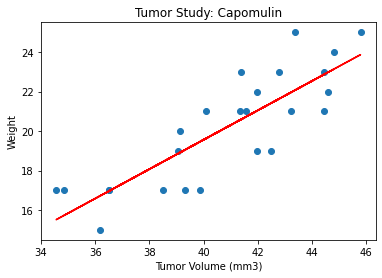

In [195]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin = clean_data.loc[clean_data['Drug Regimen']=='Capomulin']
capomulin_mean = capomulin.groupby('Mouse ID').mean()
x_values = capomulin_mean['Tumor Volume (mm3)']
y_values = capomulin_mean['Weight (g)']
plt.scatter(x_values,y_values)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight')
plt.title('Tumor Study: Capomulin')


#---Add regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#---Calculate correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()